<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2024/blob/main/notebooks/es6/MetodiAI_Fis2024_Es6_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Esercitazione 6: clustering non-supervisionato con k-means e GMM, confronto con PCA e con classificazione supervisonata basata su k-NN.

**Task:** Scopo: familiarizzare con l'implementazione di algoritmi di clustering usando il package scikit-learn

**Dataset:** World Happiness Report 2016

Il World Happiness Report è una survey di riferimento sullo stato della felicità nel mondo.

Gli happiness score e la relativa classifica utilizza i dati del sondaggo Gallup World Poll. Il punteggio è basato sulle risposte alle domande poste nel sondaggio ad abitanti i vari paesi analizzati.

Le colonne che seguono l'happiness score nella tabella fornita stimano
la misura in cui ciascuno dei sei fattori - *produzione economica, sostegno sociale, aspettativa di vita, libertà, assenza di corruzione e generosità* - contribuisce a rendere le valutazioni della qualità della vita più alte in ciascun paese rispetto a *Dystopia*, un paese ipotetico che ha valori pari alle medie nazionali più basse del mondo per ciascuno dei sei fattori. Non hanno alcun impatto sul punteggio totale (*happiness score*) riportato per ogni paese, ma spiegano perché alcuni paesi si collocano più in alto di altri.

In [1]:
!rm -rf 2016.csv
!wget http://giagu.web.cern.ch/giagu/CERN/2016.csv

--2024-04-30 19:11:53--  http://giagu.web.cern.ch/giagu/CERN/2016.csv
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.184.21.205, 2001:1458:d00:34::100:59
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.184.21.205|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17132 (17K) [text/csv]
Saving to: ‘2016.csv’

2016.csv            100%[===================>]  16.73K  --.-KB/s    in 0.1s    

2024-04-30 19:11:55 (133 KB/s) - ‘2016.csv’ saved [17132/17132]



**Parte 1:**

Loading, analisi e pre-processamento del dataset:

1.   leggere con pandas il dataset
2.   analisi statistica descrittiva del dataset
3.   utilizzzando come features:
```
['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
```
implementare un'analisi PCA a 2 componenti del campione, graficando in due dimensioni gli elementi del dataset opportunamente colorati in base al valore del *Happiness Score* categorizzato (con un certo livello di arbitrarietà) come:
```
felice: HS = 0:     ['Happiness Score']>=6.5$
neutro: HS = 1: 6.5>['Happiness Score']>4.5$
triste  HS = 2:     ['Happiness Score']<=4.5$
```


In [1]:
#code
import pandas as pd
import numpy as np

dataframe = pd.read_csv("2016.csv")
features = dataframe[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']]

display(features)

data_mean = features.mean()
data_std  = features.std()
features_norm = (features-data_mean)/data_std

display(features.describe())
display(features_norm.describe())
features_norm = features_norm.to_numpy().copy()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...
152,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02
mean,0.000000,-2.715450e-16,2.262875e-16,-2.715450e-16,2.262875e-16,5.657187e-18,-4.073175e-16
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.311901,-2.975643e+00,-2.431310e+00,-2.549668e+00,-1.239430e+00,-1.814016e+00,-2.781005e+00
25%,-0.687453,-5.690957e-01,-7.617597e-01,-7.801279e-01,-6.877269e-01,-6.584012e-01,-5.423934e-01
50%,0.179159,1.792197e-01,1.699200e-01,1.819580e-01,-2.895746e-01,-1.509088e-01,-6.467220e-02
75%,0.789539,8.544957e-01,7.513042e-01,7.802806e-01,3.414711e-01,5.174740e-01,6.249187e-01
max,2.109549,1.460932e+00,1.722923e+00,1.632131e+00,3.310457e+00,4.314397e+00,2.788376e+00


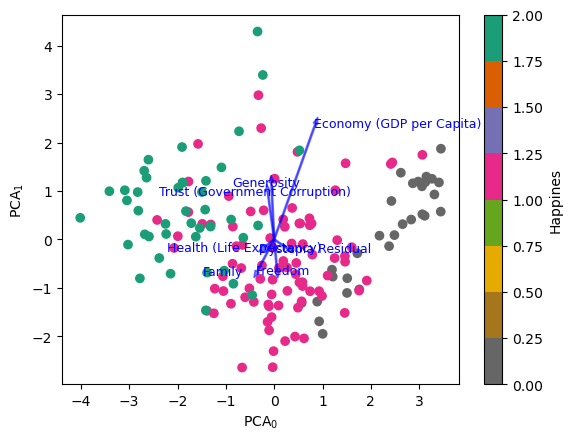

In [2]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

labels = dataframe['Happiness Score'].to_numpy().copy()
labels[ dataframe['Happiness Score'] > 4.5 ] = 1
labels[ dataframe['Happiness Score'] >= 6.5 ] = 0
labels[ dataframe['Happiness Score'] <= 4.5 ] = 2
labels = labels.astype(int)

pca = PCA(7)
features_pca = pca.fit_transform(features_norm)

plt.scatter(features_pca[:,0], features_pca[:,1], cmap='Dark2_r', c=labels)
plt.xlabel('PCA$_0$')
plt.ylabel('PCA$_1$')
plt.colorbar(label='Happines')
# Add arrows for original feature directions projected in PCA space
for i, feature in enumerate(features):
    # Compute the direction of the original feature in the PCA space
    arrow = pca.components_[i] * np.sqrt(pca.explained_variance_[i])
    plt.arrow(0, 0, arrow[0], 3*arrow[1], color='blue', alpha=0.5, width=0.03, head_width=0.1)
    plt.text(3*arrow[0], 3*arrow[1], feature, color='blue', fontsize=9, ha='center', va='center')
    #if i==4:
      #break

plt.show()
#labels = np.zeros(3)
#labels[0] = features[ dataframe ['Happiness Score']>=6.5]

In [3]:
#@title Soluzione 1.1
import numpy as np
import pandas as pd

data = pd.read_csv('2016.csv')
display(data)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [4]:
#@title Soluzione 1.2
features = list(data.columns[6:13])
hs = [data.columns[3]]

print(features)
print(hs)

display(data[features].describe())
print()
display(data[features].corr())

['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
['Happiness Score']


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Economy (GDP per Capita),1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001
Dystopia Residual,0.068624,0.119672,0.100857,0.091631,-0.002909,-0.133001,1.000000


In [5]:
#@title Soluzione 1.3A
#aggiungiamo label di happines score

# tristi (HS label == 2)
data['HS'] = ((data['Happiness Score']<=4.5)*2)  #2 per le righe che soddisfano la condizione, 0 altrimenti
# neutri (HS label == 1)
data['HS'] = data['HS'] + (((data['Happiness Score']>4.5) & (data['Happiness Score']<6.5))*1) #+1 per le righe che soddisfano la condizione
# il resto sono i paesi felici (HS lbel == 0)

#normalizzazione delle feature (sottraiamo la media di ogni colonna) e dividiamo per la stdv di ogni colonna

data_norm = data.copy()

data_mean = data_norm[features].mean()
data_std  = data_norm[features].std()
data_norm[features] = (data_norm[features]-data_mean)/data_std

print ('Media osservabili dopo normalizzazione')
print(data_norm[features].mean())
print ('Deviazione standard osservabili dopo normalizzazione')
print(data_norm[features].std())

Media osservabili dopo normalizzazione
Economy (GDP per Capita)         0.000000e+00
Family                          -2.715450e-16
Health (Life Expectancy)         2.262875e-16
Freedom                         -2.715450e-16
Trust (Government Corruption)    2.262875e-16
Generosity                       5.657187e-18
Dystopia Residual               -4.073175e-16
dtype: float64
Deviazione standard osservabili dopo normalizzazione
Economy (GDP per Capita)         1.0
Family                           1.0
Health (Life Expectancy)         1.0
Freedom                          1.0
Trust (Government Corruption)    1.0
Generosity                       1.0
Dystopia Residual                1.0
dtype: float64


In [5]:
data["Region"]

0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                       Western Europe
                    ...               
152                 Sub-Saharan Africa
153                      Southern Asia
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
Name: Region, Length: 157, dtype: object

Explained variation per principal component: [0.41749694 0.20266625 0.14012822 0.09499404 0.07408426 0.05079019
 0.01984009]


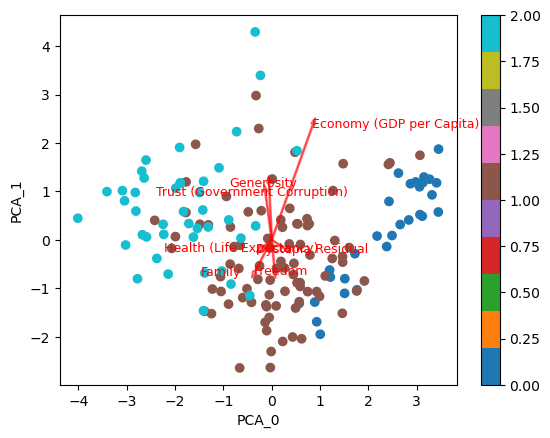

'# alternative labeling using the geografical region\n# Get unique labels\nunique_labels = list(set(data["Region"]))\n\n# Generate colors using a colormap\ncolor_map = plt.get_cmap(\'tab10\')  # You can change \'tab10\' to any other colormap name\n\n# Dictionary to map labels to colors\nlabel_colors = {label: color_map(i) for i, label in enumerate(unique_labels)}\n\nplt.scatter(pca_result[:,0], pca_result[:,1], c=[label_colors[r] for r in data["Region"]], cmap=\'tab10\')\n\n'

In [19]:
#@title Soluzione 1.3B
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca_result = pca.fit_transform(data_norm[features])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#NOTA: l'explained variation indica quanto ciascuna componente contribusice alla varianza totale del campione

import matplotlib.pyplot as plt
plt.scatter(pca_result[:,0], pca_result[:,1], c=data_norm['HS'], cmap='tab10')

plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
_ = plt.colorbar()

# Add arrows for original feature directions projected in PCA space
for i, feature in enumerate(features):
    # Compute the direction of the original feature in the PCA space
    arrow = pca.components_[i] * np.sqrt(pca.explained_variance_[i])
    plt.arrow(0, 0, arrow[0], 3*arrow[1], color='r', alpha=0.5, width=0.03, head_width=0.1)
    plt.text(3*arrow[0], 3*arrow[1], feature, color='r', fontsize=9, ha='center', va='center')
    #if i==4:
      #break

plt.show()

'''# alternative labeling using the geografical region
# Get unique labels
unique_labels = list(set(data["Region"]))

# Generate colors using a colormap
color_map = plt.get_cmap('tab10')  # You can change 'tab10' to any other colormap name

# Dictionary to map labels to colors
label_colors = {label: color_map(i) for i, label in enumerate(unique_labels)}

plt.scatter(pca_result[:,0], pca_result[:,1], c=[label_colors[r] for r in data["Region"]], cmap='tab10')

'''

**Parte 2:**

**Clustering k-means**

1.   implementare un clustering k-means con $k=[2,10]$ e trovare i valori di k più compatibili con il campione con il metodo dell'elbow
2.   provare ad usare il metodo *Silhouette*:
```
La silouette S misura quanto è simile un punto ai punti del suo cluster (coesione A), confrontato con quanto è dissimile ai punti degli altri cluster (separazione B):
S = (B-A)/max(A,B)
S raggiunge un massimo globale per il k ottimale ...
usare: sklearn.metrics.silhouette_score
```
quale dei due metodi funziona meglio?

3.   colorare i punti nello spazio 2D PCA con i risultati del clustering k-means ottenuti con il k ottimale e confrontare qualitativamente con le label dei tre gruppi basati sull'HappinessScore
4.   addestrare infine un k-means con k=3 clusters e calcolare l'accuracy tra cluster predetto e gruppo basato sull'HappinesScore

> NOTA IMPORTANTE: l'indice di gruppo di un algoritmo di clustering in generale non corrisponde all'indice di classe (non è un algoritmo di classificazione e l'indice di cluster è solo un contatore interno di associazione di ogni evento del campione ad uno dei cluster ricostruiti dall'algoritmo).
Per calcolare una pseudo-accuracy bisogna quindi o mappare gli indici tra loro (facile se ci sono pochi cluster) o usare un algoritmo diverso tipo [adjusted_rand_score](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) di scikit-learn.

**Clustering GMM**

5.   implementare un clustering GMM con 3 componenti, usando l'implementazione di scikit-learn: *from sklearn.mixture import GaussianMixture*
6.   colorare i punti nello spazio 2D PCA con i risultati del clustering GMM e confrontare con le label dei tre gruppi basati sull'HappinessScore, e plottare le regioni con il 68% di probabilità di appartenere a ciascuna componente gaussiana (suggerimento: produrre una grid sullo spazio PCA-0, PCA-1, applicare la trasformazione inversa PCA ai punti di tale grid, e poi applicare la predizione della probabilità della GMM *predict_proba* ai diversi punti)


C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

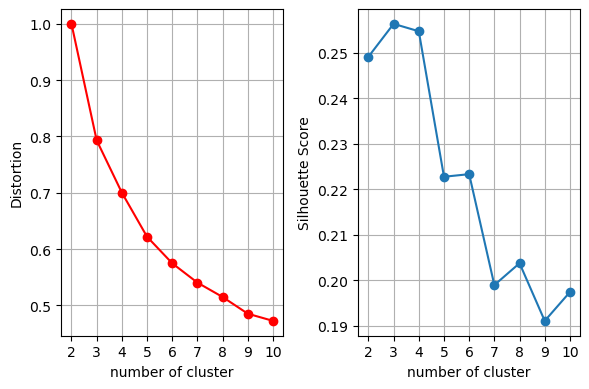

### k ottimale : 3

In [8]:
#code
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_max = 10
k_range = range(2, k_max+1, 1)
distortion = np.zeros(len(k_range))
sil_score = np.zeros(len(k_range))

for i, k in enumerate(k_range):
    model = KMeans(
            n_clusters=k,
            random_state=42,
            max_iter=600,
            n_init=20,
            )
    model.fit(features_norm)
    distortion[i] = model.inertia_
    sil_score[i] = silhouette_score(features_norm, model.labels_)

distortion/=distortion[0]

plt.figure(figsize=(6,4))
ax = plt.subplot(1,2,1)
ax.set_xticks(k_range)
plt.plot(k_range, distortion, '-or')
plt.xlabel('number of cluster')
plt.ylabel('Distortion')
plt.grid()

ax = plt.subplot(1,2,2)
ax.set_xticks(k_range)
plt.plot(k_range, sil_score, '-o')
plt.xlabel('number of cluster')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()

k_best = k_range[np.where(sil_score == sil_score.max())[0][0]]
from IPython.display import Markdown
display(Markdown(f'### k ottimale : {k_best}'))

C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


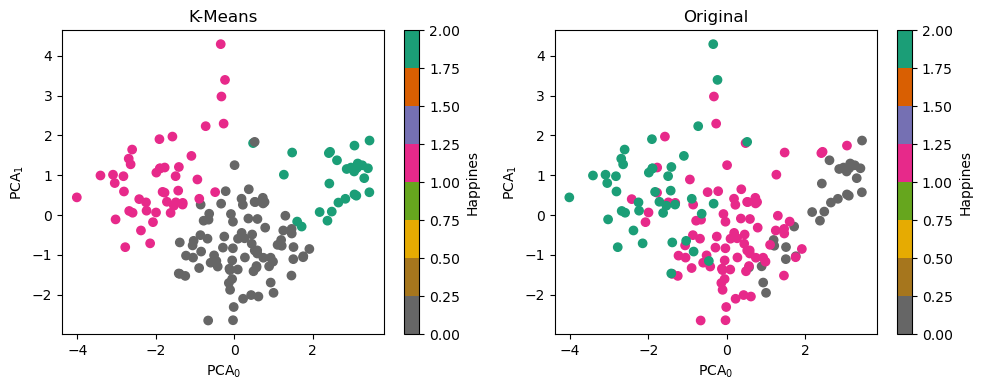

In [10]:
kmeans = KMeans(
        n_clusters=k_best,
        random_state=42,
        max_iter=600,
        n_init=20,
        )
kmeans.fit(features_norm)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(features_pca[:,0], features_pca[:,1], cmap='Dark2_r', c=kmeans.labels_)
plt.title('K-Means')
plt.xlabel('PCA$_0$')
plt.ylabel('PCA$_1$')
plt.colorbar(label='Happines')

plt.subplot(1,2,2)
plt.scatter(features_pca[:,0], features_pca[:,1], cmap='Dark2_r', c=labels)
plt.title('Original')
plt.xlabel('PCA$_0$')
plt.ylabel('PCA$_1$')
plt.colorbar(label='Happines')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import adjusted_rand_score

happ_pred = kmeans.predict(features_norm)
happ_pred += 10 # sommo 10 alle classi 0, 1, 2
happ_pred[ happ_pred == 10 ] = 2
happ_pred[ happ_pred == 11 ] = 0
happ_pred[ happ_pred == 12 ] = 1

print("k-Means (k=3) accuracy:\t\t", accuracy(labels, happ_pred))
print("k-Means (k=3) adj. rand score:\t", adjusted_rand_score(labels, happ_pred))

k-Means (k=3) accuracy:		 0.09554140127388536
k-Means (k=3) adj. rand score:	 0.3929517499920392


C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


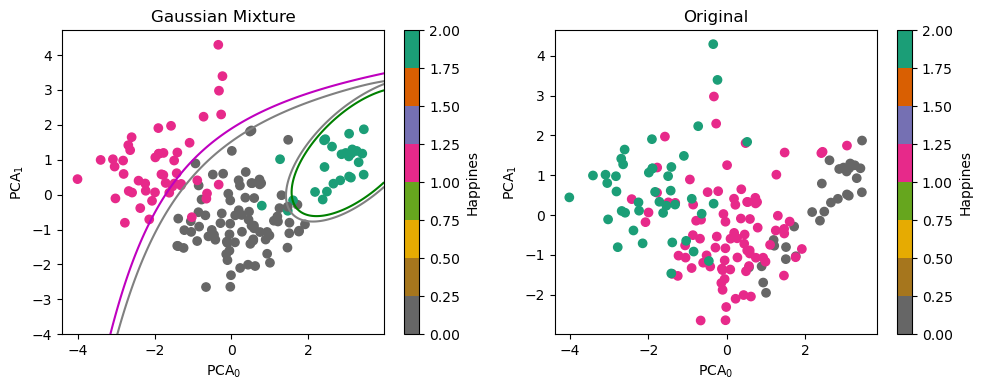

Gaussian Mixture accuracy:		 0.34394904458598724
Gaussian Mixture adj. rand score:	 0.4406316669401394


In [12]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(3, random_state=2).fit(features_norm)
gm_predict = gm.predict(features_norm)


plt.figure(figsize=(10,4))

h = .02
xx, yy = np.meshgrid(np.arange(-4., 4., h),
                     np.arange(-4., 4., h))

zz = np.c_[xx.ravel(), yy.ravel()]

pca = PCA(2)
pca.fit(features_norm)

zz_orig = pca.inverse_transform(zz)
labels_gm_proba = gm.predict_proba(zz_orig)

labels_gm_proba = labels_gm_proba.reshape((xx.shape[0],xx.shape[1],3))

plt.subplot(1,2,1)
plt.contour(xx, yy, labels_gm_proba[:,:,0], levels=[0.68], colors='gray')
plt.contour(xx, yy, labels_gm_proba[:,:,1], levels=[0.68], colors='m')
plt.contour(xx, yy, labels_gm_proba[:,:,2], levels=[0.68], colors='green')
plt.scatter(features_pca[:,0], features_pca[:,1], cmap='Dark2_r', c=gm_predict)
plt.title('Gaussian Mixture')
plt.xlabel('PCA$_0$')
plt.ylabel('PCA$_1$')
plt.colorbar(label='Happines')

plt.subplot(1,2,2)
plt.scatter(features_pca[:,0], features_pca[:,1], cmap='Dark2_r', c=labels)
plt.title('Original')
plt.xlabel('PCA$_0$')
plt.ylabel('PCA$_1$')
plt.colorbar(label='Happines')

plt.tight_layout()
plt.show()

happ_pred = gm.predict(features_norm)
map = np.array([0, 2, 1])

print("Gaussian Mixture accuracy:\t\t", accuracy(labels, map[ happ_pred ]))
print("Gaussian Mixture adj. rand score:\t", adjusted_rand_score(labels, happ_pred))

C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

Valore ottimale di k =  3


C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mark\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


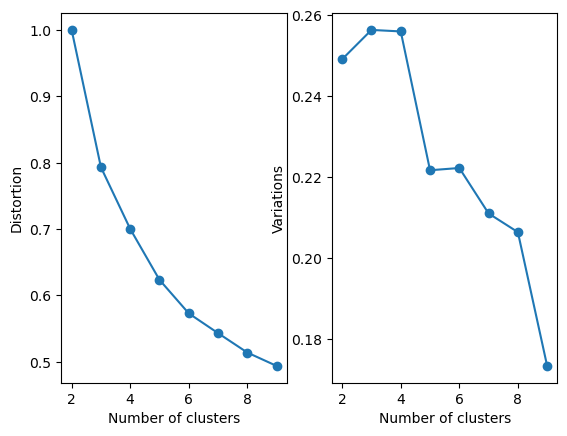

In [13]:
#@title Soluzione 2.1-2
#Clustering using k-means

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# calcoliamo il best k usando la distorsione e la shilouette
k_max=10
distortions = []
variations = []
for i in range(2, k_max):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=20, max_iter=600,
        tol=1e-04, random_state=0
    )
    km.fit(data_norm[features].values)
    labels = km.labels_

    distortions.append(km.inertia_)
    variations.append(silhouette_score(data_norm[features].values, labels, metric = 'euclidean'))


# plot
plt.subplot(1,2,1)
plt.plot(range(2, k_max), [x/distortions[0] for x in distortions], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.subplot(1,2,2)
plt.plot(range(2, k_max), variations, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Variations')

valori = range(2, k_max)
k_optim = valori[variations.index(max(variations))]
print('Valore ottimale di k = ', k_optim)

In [ ]:
#@title Soluzione 2.3
#plot
km = KMeans(
    n_clusters=k_optim, init='k-means++',
    n_init=20, max_iter=600,
    tol=1e-04, random_state=0
)
y_km = km.fit(data_norm[features].values)
y_pred = y_km.labels_.astype(int)

plt.scatter(pca_result[:,0], pca_result[:,1], c=y_pred, cmap='tab10')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.colorbar()

In [ ]:
#@title Soluzione 2.4A
#plot
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=20, max_iter=600,
    tol=1e-04, random_state=0
)
y_km = km.fit(data_norm[features].values)
y_pred = y_km.labels_.astype(int)

plt.scatter(pca_result[:,0], pca_result[:,1], c=y_pred, cmap='tab10')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.colorbar()

In [ ]:
#@title Soluzione 2.4B
from sklearn.metrics import accuracy_score, adjusted_rand_score

#NOTA: l'indice di gruppo di k-means non è detto che corrisponda all'indice di classe
# per calcolare una pseudo-accuracy bisogna o mappare gli indici tra loro (facile se sono pochi cluster)
# oppure usare adjusted_rand_score
# (https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

# dai plot delle PCA si osserva che nel caso specifico  che gli indici di cluster 0,1,2 di k-means corrispondono a quelli
# delle label reali (è un caso)

mappa = np.array([0,1,2]) #la mappa è 1 a 1

y_true = data_norm['HS'].values

accuracy_kmeans_3 = accuracy_score(data_norm['HS'].values, mappa[y_pred])
print('k-maens (k=3) pseudo-accuracy from manual mapping: ', accuracy_kmeans_3)

accuracy_kmeans_3_rs = adjusted_rand_score(data_norm['HS'].values, y_pred)
print('k-maens (k=3) adjusted rand-score: ', accuracy_kmeans_3_rs)

In [ ]:
#@title Soluzione 2.5/2.6
#Clustering using Gaussian Mixture

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm.fit(data_norm[features].values)

y_pred = gmm.predict(data_norm[features].values)

#procedura: grid nello spazio PCA e poi trasformazione PCA inversa per
#tornare nello spazio originale al quale applicare la predizione della gmm
h = .02

xx, yy = np.meshgrid(np.arange(-4., 4., h),
                     np.arange(-4., 4., h))

zz = np.c_[xx.ravel(), yy.ravel()]

pca = PCA(2)
pca.fit(data_norm[features].values)

zz_orig = pca.inverse_transform(zz)
prob = gmm.predict_proba(zz_orig)

prob = prob.reshape((xx.shape[0],xx.shape[1],3))

plt.contour(xx, yy, prob[:,:,0], levels=[0.68], colors='blue')
plt.contour(xx, yy, prob[:,:,1], levels=[0.68], colors='brown')
plt.contour(xx, yy, prob[:,:,2], levels=[0.68], colors='green')

plt.scatter(pca_result[:,0], pca_result[:,1], c=y_pred, cmap='tab10')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
plt.colorbar()

**Parte 3:**

Confronto con un classificatore k-NN

1.   classificare gli eventi del campione con un classificatore supervisionato k-NN usando come label i tre gruppi felice, neutro, triste (0,1,2) dell'HappinesScore (scegliere in modo opportuno il numero di primi vicini per il k-NN utilizzando una k-fold x-validation)
2.   confrontare con l'accuracy otteuta usando come predizione della classe l'indice di cluster di k-means fatta al punto 2.4B

In [169]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# parametri di split
test_perc = 0.2
folds = 10
iterations = range(0, 30)
normalize=True

# KFold iniziale
kf = KFold(n_splits=folds)
train_fts, test_fts, train_lbs, test_lbs = train_test_split(features_norm, labels, shuffle=True, test_size=test_perc, random_state=42)
_, test_pca_fts, _, test_pca_lbs = train_test_split(features_pca, labels, shuffle=True, test_size=test_perc, random_state=42)

display(Markdown(f'### Lunghezza dei campioni: '))
display(Markdown(f'**Train**: *{len(train_fts)}* ; **Test**: *{len(test_fts)}*'))

### Lunghezza dei campioni: 

**Train**: *125* ; **Test**: *32*

k = 1 	 avg. accuracy= 0.8782051282051281
k = 2 	 avg. accuracy= 0.8782051282051281
k = 3 	 avg. accuracy= 0.8551282051282051
k = 4 	 avg. accuracy= 0.8474358974358973
k = 5 	 avg. accuracy= 0.8788461538461538
k = 6 	 avg. accuracy= 0.8538461538461538
k = 7 	 avg. accuracy= 0.8384615384615385
k = 8 	 avg. accuracy= 0.8461538461538461
k = 9 	 avg. accuracy= 0.8314102564102563
k = 10 	 avg. accuracy= 0.848076923076923
k = 11 	 avg. accuracy= 0.8403846153846153
k = 12 	 avg. accuracy= 0.8474358974358974
k = 13 	 avg. accuracy= 0.8397435897435898
k = 14 	 avg. accuracy= 0.832051282051282
k = 15 	 avg. accuracy= 0.8243589743589743
k = 16 	 avg. accuracy= 0.8160256410256409
k = 17 	 avg. accuracy= 0.8160256410256409
k = 18 	 avg. accuracy= 0.8160256410256409
k = 19 	 avg. accuracy= 0.807051282051282
k = 20 	 avg. accuracy= 0.823076923076923
best avg. accuracy: 0.8788461538461538  for k = 5


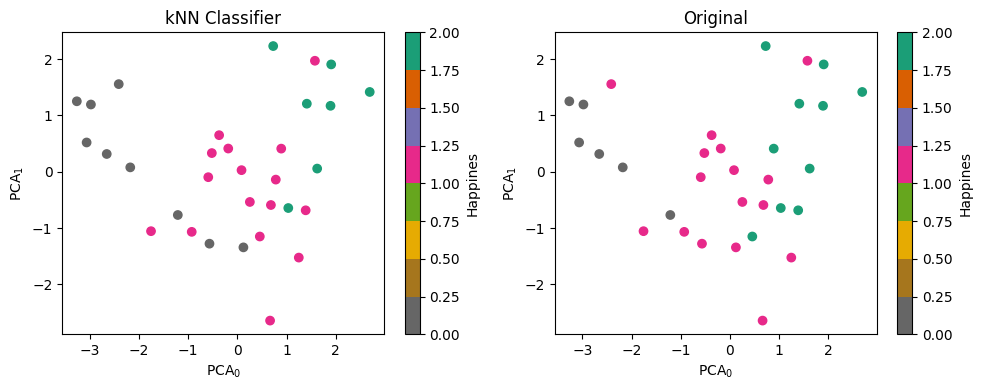

In [173]:
#code
from sklearn.neighbors import KNeighborsClassifier as kNN

k_max = 20
k_range = range(1, k_max+1, 1)
test_score = np.zeros(len(k_range))

for i, k in enumerate(k_range):
    for _, (train_split, test_split) in enumerate(kf.split(train_fts)):
        model = kNN(n_neighbors=k)
        model.fit(train_fts[train_split], train_lbs[train_split])
        test_score[i] += model.score(train_fts[test_split], train_lbs[test_split])
    test_score[i] /= folds
    print("k =", k, "\t avg. accuracy=", test_score[i])

k_idx = np.where(test_score == test_score.max())[0][0]
best_k_kNN = k_range[ k_idx ]
print("best avg. accuracy:", test_score.max(), " for k =", best_k_kNN)

model = kNN(n_neighbors=best_k_kNN)
model.fit(train_fts, train_lbs)
kNN_prediction = model.predict(test_fts)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(test_pca_fts[:,0], test_pca_fts[:,1], cmap='Dark2_r', c=kNN_prediction)
plt.title('kNN Classifier')
plt.xlabel('PCA$_0$')
plt.ylabel('PCA$_1$')
plt.colorbar(label='Happines')

plt.subplot(1,2,2)
plt.scatter(test_pca_fts[:,0], test_pca_fts[:,1], cmap='Dark2_r', c=test_pca_lbs)
plt.title('Original')
plt.xlabel('PCA$_0$')
plt.ylabel('PCA$_1$')
plt.colorbar(label='Happines')

plt.tight_layout()
plt.show()

In [ ]:
#@title Soluzione 3
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
#aggiungo le variabili PCA  al dataframe per comodità

data_norm['PCA_0'] = pca_result[:,0]
data_norm['PCA_1'] = pca_result[:,1]

#randomizzo gli eventi
rnd_raws = np.random.permutation(len(data_norm))
data_norm_shuffled = data_norm.iloc[rnd_raws]
data_norm_shuffled.reset_index(drop=True)

#divido il campione in 2 campioni 50% train/vali e 30% test
train = data_norm_shuffled[:int(0.5*len(data_norm_shuffled.index))].copy()
test = data_norm_shuffled[int(0.5*len(data_norm_shuffled.index)):].copy()

train.reset_index(drop=True)
test.reset_index(drop=True)

X = train[features].values
y = train['HS'].values

acc = []
krange = range(1,20)
for n_primivicini in krange:
    model = neighbors.KNeighborsClassifier(n_primivicini)
    scores = cross_val_score(model, X, y, cv=5)
    acc.append(np.mean(scores))
    print('k = ', n_primivicini, ' average accuracy = ', np.mean(scores))

best_k = krange[acc.index(max(acc))]
print('Best test accuracy', max(acc), ' for k = ', best_k)

model = neighbors.KNeighborsClassifier(best_k)
model.fit(X,y)
y_pred=model.predict(test[features].values)

plt.scatter(test['PCA_0'], test['PCA_1'], c=y_pred, cmap='tab10')
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')
_ = plt.colorbar()

print('k-maens (k=3) pseudo-accuracy from manual mapping: ', accuracy_kmeans_3)

**Per casa:**

testare i vari algoritmi di clustering in funzione dei loro parametri

indentificare quali tra le feature del World Happines report dataset forniscono il maggior contributo all'Happines Rank: i.e. cosa rende un paese più felice?

provare ad utilizzare gli altri algoritmi di clustering (agglomerativo, DBSCAN) che abbiamo discusso durante la lezione in aula

esistono versioni più recenti del db world happiness score (fino al 2023), provare a combinare più anni e/o confrontare anni pre covid con anni post-covid per capire se ci siano state variazioni significative ([ Worls Happines Report](https://worldhappiness.report)).